Intro
-------

So I've written all of my code in a separate backend.py file in the same folder and I'm just importing it like a module in order to do the calculations.

The code I've written makes use of classes and methods. The way it works is that one can create an object containing a list of charges which then has methods to work out potential, electric field and potential energy.

The charge_system class can take structures of molecules such as water and position them in 3d space with different orientations. The molecules in this case are just point charges at each atom with the same partial charge due to dipoles. 

In the below example you can see water being rotated in space when you move the sliders.

In [30]:
from ipywidgets import interact
from backend import *
from numpy import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
def plot_charges(system, s):
    plt.figure()
    ax = plt.subplot(1,1,1, projection = "3d")
    ax.set_xlim(-s, s), ax.set_ylim(-s, s), ax.set_zlim(-s, s)  
    [ax.scatter3D(i.position[0], i.position[1], i.position[2], color = i.colour) for i in system.charges]        
@interact(rad = (-1,1,0.1),x_rot=(-pi,pi, pi/12),y_rot=(-pi,pi, pi/12),z_rot=(-pi,pi, pi/12))
def example(rad = 0, x_rot = 0, y_rot = 0, z_rot = 0):
    box = charge_system([])
    box.water(radius = rad, x_angle = x_rot,y_angle = y_rot, z_angle = z_rot, centre = [0, 0, 0])
    plot_charges(box, 2)
    

interactive(children=(FloatSlider(value=0.0, description='rad', max=1.0, min=-1.0), FloatSlider(value=0.0, des…

Point charge potential:

In [17]:
print("potential at (0,0,0) A with a charge 1e at (1,1,1) A =", str(charge_system([charge([1,1,1], 1)]).potential([0,0,0]))[:4], "V")

potential at (0,0,0) A with a charge 1e at (1,1,1) A = 8.31 V


Charges around a ring
---------------

Potential at (0,0,100) A = 0.143 V
Electric field at (0,0,100) A = 1.440e+07 N/C


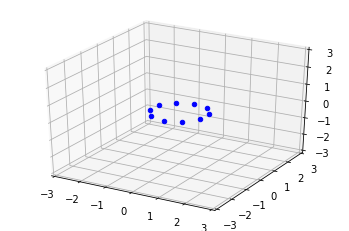

In [25]:
ring_list, n = [], 10
r = 1 #radius of the circle
q = 1 #total charge of the circle
for i in range(n):
    angle = i*2*pi/n
    ring_list.append(charge([sin(angle), cos(angle), 0], q/n, colour = "blue"))
ring_system = charge_system(ring_list)
z = 100
print("Potential at (0,0,"+ str(z)+ ") A =",str(ring_system.potential([0,0,z]))[:5], "V")
print("Electric field at (0,0,"+ str(z)+ ") A =", "%.3e" % ring_system.electric_field([0,0,z])[1] , "N/C")

The electric field calculated here is equal to the calculated magnetic field using the formula derived using Gauss's law:

$$E = \frac{QR}{4\pi\epsilon_{0}(D^{2}+R^{2})^{\frac{3}{2}}}$$
Where D is the distance from the centre of the circle along the normal to the plane of the circle. R is the radius of the circle, Q is the total charge of the circle.

In [59]:
gauss_law_ring = lambda D, R: 1.6e-19*1e-10*R/(4*pi*e0*((D*1e-10)**2+(R*1e-10)**2)**(3/2))
print("%.3e" % gauss_law_ring(100, 1))

1.438e+05


8.854187817e-12